## BrainStation Data Science Final Project - GlassDoor Salary Data Analysis

In this project I go through the data trends of the glassdoor tech jobs dataset I found on kaggle. My purpose is to identify the highest paying skill as a data scientist of the listed skills, like Python, R, spark, AWS and excel.
Link - https://www.kaggle.com/datasets/thedevastator/jobs-dataset-from-glassdoor/data


### About the Data

This dataset contains job postings from Glassdoor.com from 2017 with the following features It can be used to analyze the current trends based on job positions, company size, etc.

#### Data Columns

##### File: eda_data.csv and salary_data_cleaned.csv

| Column name | Description                                                                                          |
| ----------- | ---------------------------------------------------------------------------------------------------- |
| job_state   | The state where the job is located (String)                                                          |
| same_state  | A binary indicator of whether the job is in the same state as the person looking at the job (String) |
| age         | The age of the person looking at the job (Numeric)                                                   |
| python_yn   | A binary indicator of whether the person looking at the job knows Python (String)                    |
| R_yn        | A binary indicator of whether the person looking at the job knows R (String)                         |
| spark       | A binary indicator of whether the person looking at the job knows Spark (String)                     |
| aws         | A binary indicator of whether the person looking at the job knows AWS (String)                       |
| excel       | A binary indicator of whether the person looking at the job knows Excel (String)                     |

##### File: glassdoor_jobs.csv

| Column name | Description                                         |
| ----------- | --------------------------------------------------- |
| job_id      | The unique identifier for the job posting (Numeric) |


## Importing Dependencies


In [34]:
#Importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing Files


In [35]:
df = pd.read_csv('data/eda_data.csv', index_col=0)
df.head(20)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,0,0,0,1,data scientist,na,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,0,0,0,0,data scientist,na,4783,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,0,1,0,1,data scientist,na,3461,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,0,0,0,0,data scientist,na,3883,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,0,0,0,1,data scientist,na,2728,3
5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 to 500 employees,2000,Company - Public,...,20,1,0,0,1,1,data scientist,na,3747,3
6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 to 1000 employees,2008,Company - Private,...,12,0,0,0,0,1,data scientist,na,1786,0
7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 to 500 employees,2005,Company - Private,...,15,1,0,1,1,1,data scientist,na,3804,0
8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+ employees,2014,Hospital,...,6,0,0,0,0,0,na,na,1538,0
9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 to 200 employees,2009,Company - Private,...,11,1,0,1,0,0,data scientist,na,4574,2


## Cleaning Up Data


In [36]:
df.dtypes


Job Title             object
Salary Estimate       object
Job Description       object
Rating               float64
Company Name          object
Location              object
Headquarters          object
Size                  object
Founded                int64
Type of ownership     object
Industry              object
Sector                object
Revenue               object
Competitors           object
hourly                 int64
employer_provided      int64
min_salary             int64
max_salary             int64
avg_salary           float64
company_txt           object
job_state             object
same_state             int64
age                    int64
python_yn              int64
R_yn                   int64
spark                  int64
aws                    int64
excel                  int64
job_simp              object
seniority             object
desc_len               int64
num_comp               int64
dtype: object

In [37]:
#Filtering out the columns that we need for the analysis.
df.columns
df = df.filter(items=['Job Title', 'Job Description', 'Company Name', 'min_salary', 'max_salary', 'Size', 'Founded', 'job_state', 'Location'])
df.shape[0]

742

In [38]:
df.dropna()
df.shape[0]

742

In [39]:
df.drop_duplicates()
df.shape[0]

742

In [40]:
#Removing the rating from the company name
df['Company Name'] = df['Company Name'].str.split('\n').str[0]
df['Company Name']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: Company Name, Length: 742, dtype: object

## Filtering Data Science Jobs


In [41]:
df["Job Title"].value_counts()

Job Title
Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: count, Length: 264, dtype: int64

We can see that there are many positions containing the word "Data Scientist" but they have many different names forms to fitler them further.


In [42]:
df_ds = df[df["Job Title"].str.contains('Data Scientist')]
df_ds.shape[0]

279

As we can see that there are 279 jobs out of the 742 that list data scientist.  
For inital visualization looking at different jobs from different fields by plotting the value counts using the same method we had before.


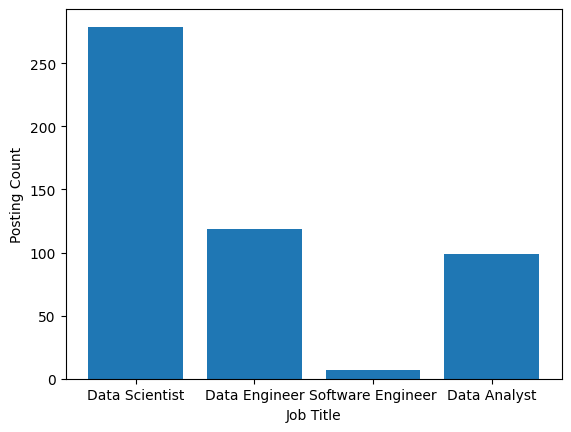

In [43]:
df_de = df[df["Job Title"].str.contains('Data Engineer')]
df_se = df[df["Job Title"].str.contains('Software Engineer')]
df_da = df[df["Job Title"].str.contains('Data Analyst')]

fig1_job_title = ['Data Scientist', 'Data Engineer', 'Software Engineer', 'Data Analyst']
fig1_counts = [df_ds.shape[0], df_de.shape[0], df_se.shape[0], df_da.shape[0]]

plt.figure()
plt.bar(fig1_job_title,fig1_counts)
plt.xlabel('Job Title')
plt.ylabel('Posting Count')
plt.show()

## Data Analysis of Salary Paid by Skill

To find out which skills has the highest potential Earnings, creating skill specific dataframes by looking for specific words in the job descriptions.  
First finding out the most popular skills using NLP


#### Importing Sklearn

Here I am using a list of popular data science skills, List generated by Chat GPT


In [44]:
from sklearn.feature_extraction.text import CountVectorizer
#List generated by Chat Gpt
data_science_skills = [
    "ml"
    "python",
    "r",
    "nlp",
    "sql",
    "machine learning",
    "statistics",
    "data visualization",
    "big data",
    "deep learning",
    "natural language processing",
    "cloud computing",
    "hadoop",
    "spark",
    "tensorflow",
    "pytorch",
    "linear algebra",
    "probability",
    "data mining",
    "predictive modeling",
    "feature engineering",
    "ensemble methods",
    "time series analysis",
    "dimensionality reduction",
    "clustering",
    "classification",
    "regression",
    "neural networks",
    "random forests",
    "support vector machines",
    "decision trees",
    "unsupervised learning",
    "supervised learning",
    "optimization",
    "data wrangling",
    "data preprocessing",
    "data cleaning",
    "exploratory data analysis",
    "model evaluation",
    "cross-validation",
    "hyperparameter tuning",
    "bias-variance tradeoff",
    "overfitting",
    "underfitting",
    "ensemble learning",
    "web scraping",
    "api integration",
    "database management",
    "git",
    "command line",
    "linux",
]

bagofwords = CountVectorizer(
    stop_words= "english",
    vocabulary= data_science_skills,
    min_df=25,
    max_df=0.5,
    max_features=1000,
    ngram_range=(1, 3),
    )

Fitting the Job Descriptions and looking at occurence of words.


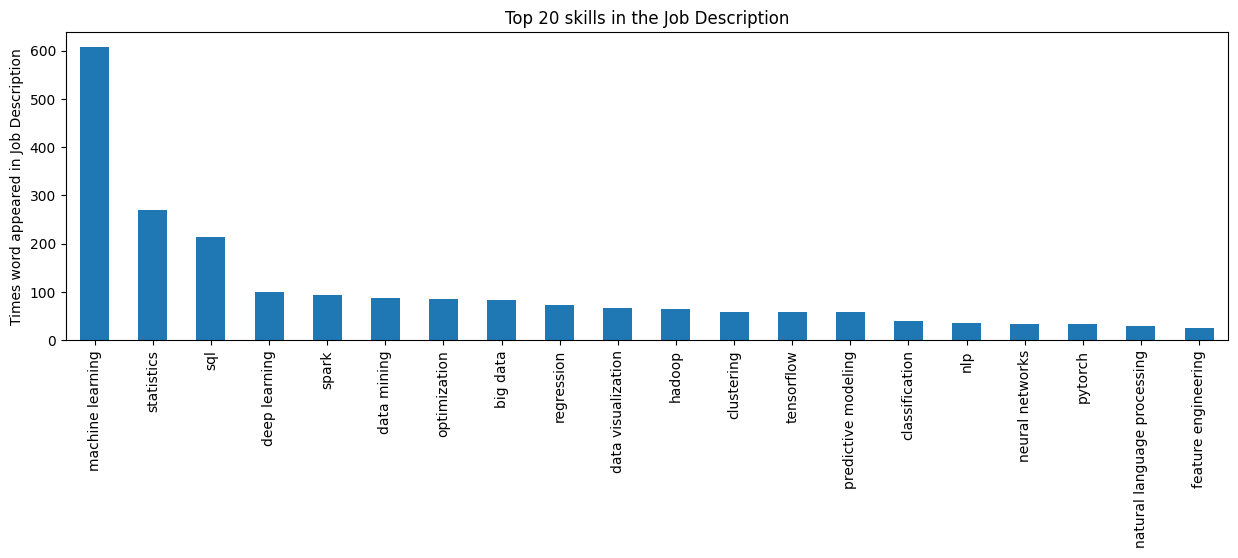

In [45]:
bagofwords.fit(df_ds['Job Description'])
transformed = bagofwords.transform(df_ds['Job Description'])
transformed_df = pd.DataFrame(columns=bagofwords.get_feature_names_out(), data = transformed.toarray())
word_counts = transformed_df.sum(axis=0).sort_values(ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 4), legend=False)
plt.title("Top 20 skills in the Job Description")
plt.ylabel("Times word appeared in Job Description")
plt.show()

Now looking at average pay per job skill for the 20 most popular skills.


C:\Users\saksh\AppData\Local\Temp\ipykernel_20852\1377299367.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_salary'] = (df['max_salary'] + df['min_salary'])/2
C:\Users\saksh\AppData\Local\Temp\ipykernel_20852\1377299367.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_salary'] = (df['max_salary'] + df['min_salary'])/2
C:\Users\saksh\AppData\Local\Temp\ipykernel_20852\1377299367.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

20 20


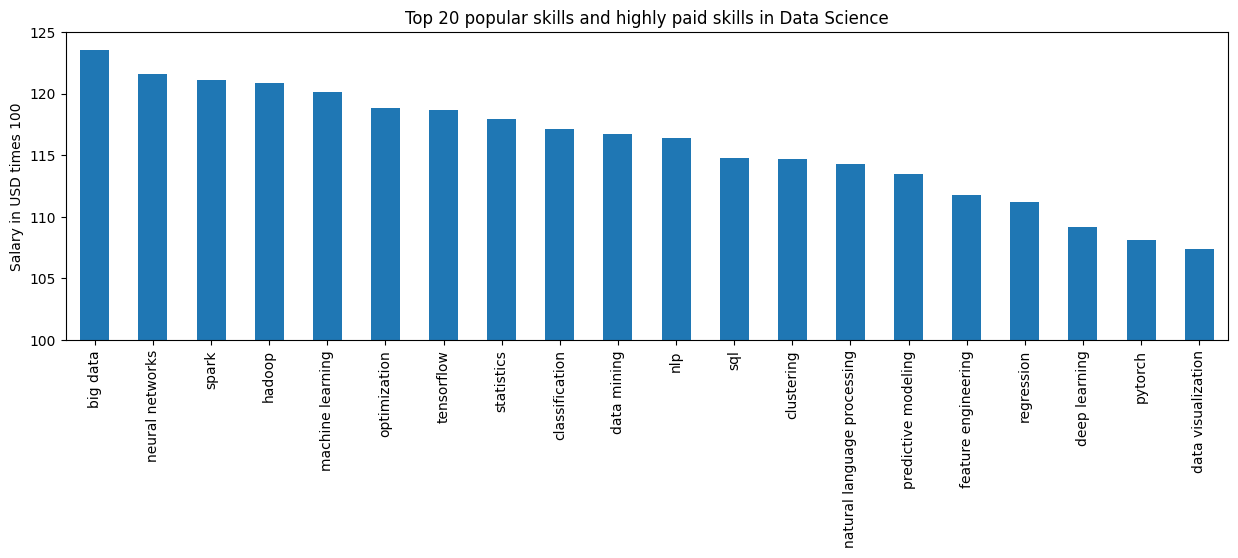

In [46]:
popular_skills = word_counts.head(20).index.to_list()
df_skills = []
avg_pay = []

for i, skill in enumerate(popular_skills):
    df_skills.append(df_ds[df_ds['Job Description'].str.contains(skill, case=False)])

for i, df in enumerate(df_skills):
    df['avg_salary'] = (df['max_salary'] + df['min_salary'])/2
    avg_pay.append(df['avg_salary'].agg('mean'))


print(len(avg_pay), len(popular_skills))

df_pay = pd.DataFrame({
    "Skill": popular_skills,
    "avg_pay": avg_pay
})

df_pay.sort_values(by='avg_pay', ascending=False, inplace=True)
df_pay.head(20).plot(kind="bar", figsize=(15, 4), legend=False)

plt.title("Top 20 popular skills and highly paid skills in Data Science")
plt.ylabel("Salary in USD times 100")
plt.xticks(np.arange(20), df_pay['Skill'].head(20).to_list())
plt.ylim((100, 125))
plt.show()


Looking at the most skills in general


C:\Users\saksh\AppData\Local\Temp\ipykernel_20852\3775462337.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_salary'] = (df['max_salary'] + df['min_salary'])/2
C:\Users\saksh\AppData\Local\Temp\ipykernel_20852\3775462337.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_salary'] = (df['max_salary'] + df['min_salary'])/2
C:\Users\saksh\AppData\Local\Temp\ipykernel_20852\3775462337.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

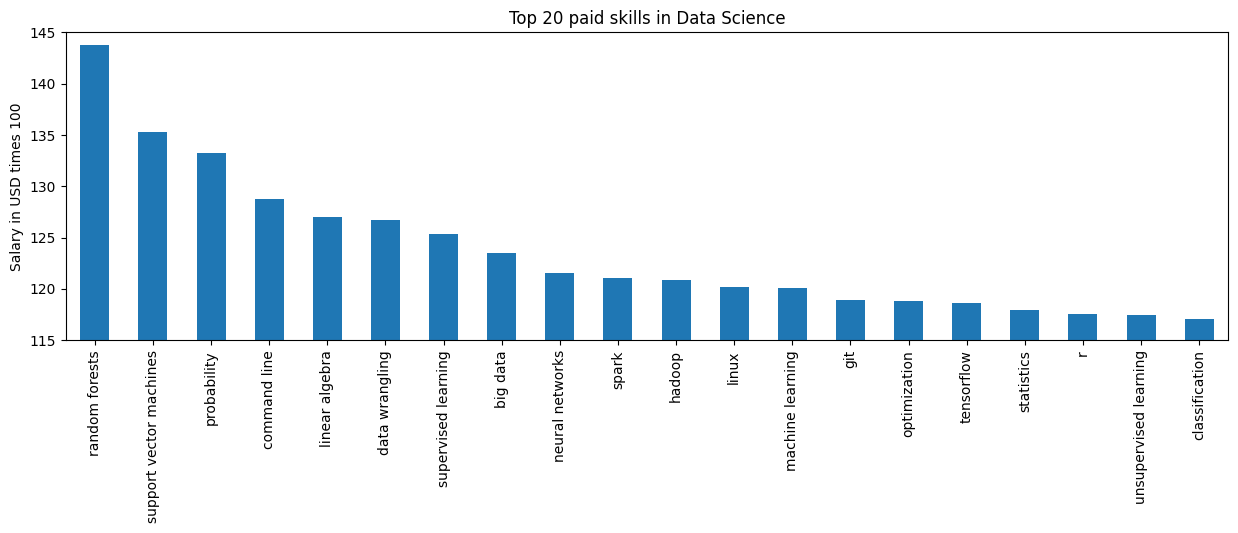

In [47]:
popular_skills = word_counts.index.to_list()
df_skills = []
avg_pay = []

for i, skill in enumerate(popular_skills):
    df_skills.append(df_ds[df_ds['Job Description'].str.contains(skill, case=False)])

for i, df in enumerate(df_skills):
    df['avg_salary'] = (df['max_salary'] + df['min_salary'])/2
    avg_pay.append(df['avg_salary'].agg('mean'))

df_pay = pd.DataFrame({
    "Skill": popular_skills,
    "avg_pay": avg_pay
})

df_pay.sort_values(by='avg_pay', ascending=False, inplace=True)
df_pay.head(20).plot(kind="bar", figsize=(15, 4), legend=False)
plt.title("Top 20 paid skills in Data Science")
plt.ylabel("Salary in USD times 100")
plt.xticks(np.arange(20), df_pay['Skill'].head(20).to_list())
plt.ylim((115, 145))
plt.show()

## Looking at Correlation between Popularity and Pay


Creating a combined dataframe to see the correlations between popularity and skill pay.


In [54]:
#Coverting count words to a data frame
df_words = pd.DataFrame ({
    "Skill": word_counts.index.tolist(),
    "Popularity": word_counts.tolist()
})

df_combined = pd.concat([df_pay.set_index('Skill'), df_words.set_index('Skill')], axis = 1, join='outer')
df_combined.sort_values(by='avg_pay', ascending=False).head(20)


,avg_pay,Popularity
Skill,,
random forests,143.785714,7
support vector machines,135.250000,4
probability,133.200000,15
command line,128.800000,8
linear algebra,127.000000,5
data wrangling,126.714286,9
supervised learning,125.388889,4
big data,123.526786,84
neural networks,121.593750,34


In [49]:
df_combined.corr()

,avg_pay,Popularity
avg_pay,1.000000,0.069069
Popularity,0.069069,1.000000


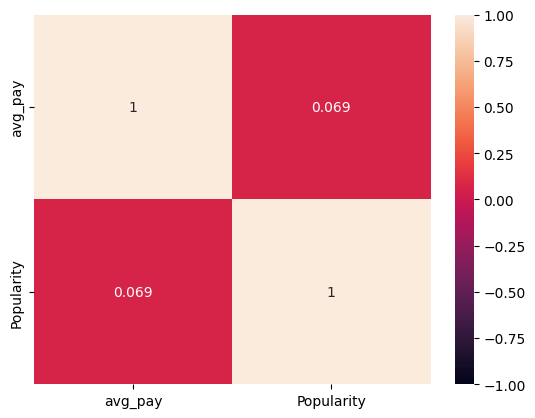

In [50]:
import seaborn as sns
sns.heatmap(df_combined.corr(),vmin = -1,vmax = 1,annot = True)
plt.show()

We see almost no correlation between the popularity of the skill and its pay.


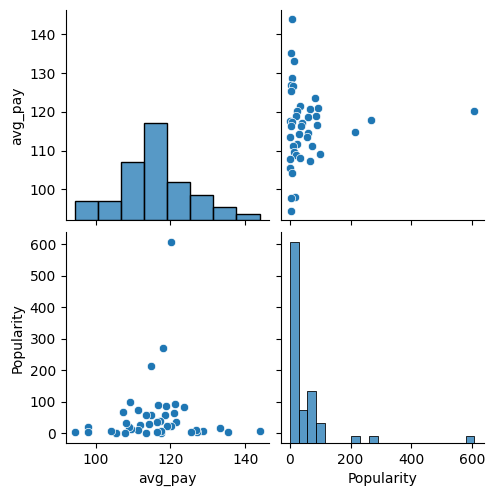

In [51]:
sns.pairplot(df_combined)

Looking at the Pair Plots and correlation matrix that the popularity of the skill doesn't affect it's pay.


## Conclusion

Thus after looking at the charts we see Jobs requiring experience with "Big Data" pay more compared to other skills but the same time, less popular skills like having knowledge about the Random Forests algorithm have the potential for higher paying jobs. Also popularity of a skill has little to no effect on how much it pays., It is just HR doing random industry Buzz Words.
